In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from scipy import ndimage as ndi
from skimage import io
import cv2

In [ ]:
# Reading image
read_image=io.imread('/content/drive/MyDrive/Images/test.png')

In [ ]:
#RGB to grayscale
#Blurring the image to remove noise
#Image thresholding
gray = cv2.cvtColor(read_image,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(5,5),0)
ret,th = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

(-0.5, 1531.5, 1954.5, -0.5)

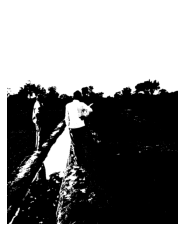

In [ ]:
plt.imshow(th,cmap=plt.cm.gray)
plt.axis('off')

In [ ]:
# Calculating distance matrix
distance = ndi.distance_transform_edt(th)

#Calculating positions of peak values i.e,markers
coords = peak_local_max(distance,min_distance=50,labels=th)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)


segmented = watershed(-distance, markers, mask=th,watershed_line=1)

In [ ]:
len(coords)           # number of markers

307

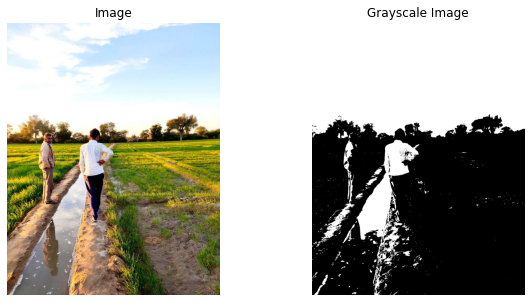

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(read_image)
plt.title('Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(th,cmap=plt.cm.gray)
plt.title('Grayscale Image')
plt.axis('off')




plt.show()

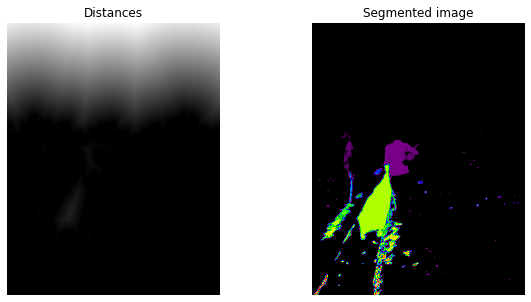

In [ ]:
plt.figure(figsize=(10,5))


plt.subplot(1,2,1)
plt.imshow(distance, cmap=plt.cm.gray)
plt.title('Distances')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(segmented,cmap=plt.cm.nipy_spectral)
plt.title('Segmented image')
plt.axis('off')

plt.show()